# Training

## Loss Function

### Mean Squared Error

$$
E=\frac{1}{2}\sum_{k}\left(y_k-t_k\right)^2
$$

In [2]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

np.float64(0.09750000000000003)

### Cross Entropy

$$
E=-\sum_{k} t_k \log y_k

$$

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

cross_entropy_error(np.array(y), np.array(t))

np.float64(0.510825457099338)

## Numerical Differentiation

### Derivative

$$
\frac{\mathrm{d}f(x)}{\mathrm{d}x}=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}
$$

In [4]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / 2 * h

$$
y = 0.01x^{2} + 0.1x
$$

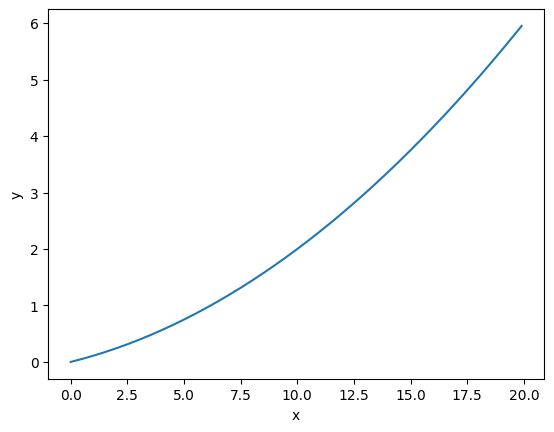

In [5]:
import matplotlib.pyplot as plt

def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [6]:
numerical_diff(function_1, 5)

1.9999999999908982e-09

### Partial Derivative

$$
f(x_0, x_1) = x_0^2 + x_1^2\\
\frac{\partial f}{\partial x_0}=2x_0,\qquad \frac{\partial f}{\partial x_1}=2x_1
$$

In [11]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

# x_0=3, x_1=4
def function_tmp_1(x0):
    return x0 * x0 + 4 ** 2

numerical_diff(function_tmp_1, 3)

6.000000000003781e-08

### Gradient

$$
\left(\frac{\partial f}{\partial x_0},\ \frac{\partial f}{\partial x_1}\right)
$$

In [15]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

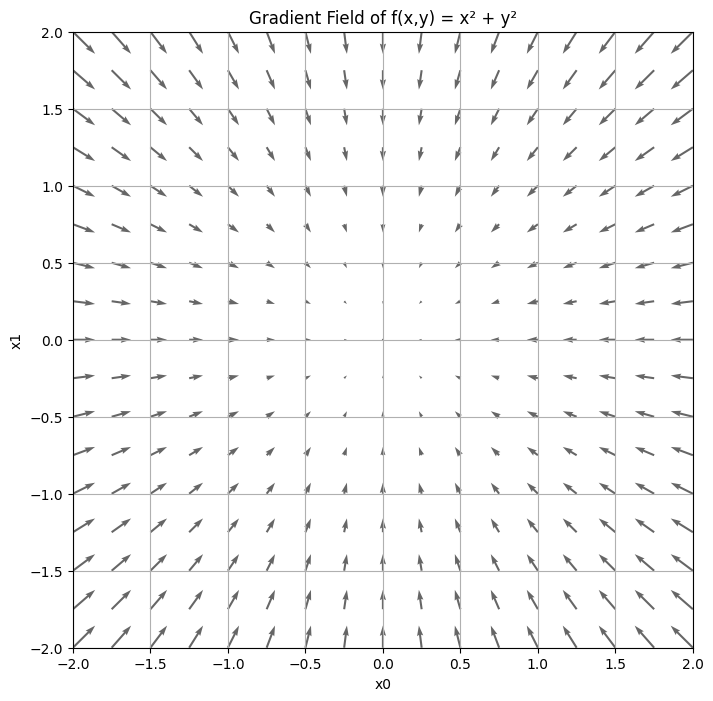

In [21]:
def numerical_gradient(f, X):
    h = 1e-4
    grad = np.zeros_like(X)
    it = np.nditer(X, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = X[idx]
        X[idx] = tmp_val + h
        fxh1 = f(X)
        X[idx] = tmp_val - h
        fxh2 = f(X)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        X[idx] = tmp_val
        it.iternext()
    return grad

def plot_gradient_field():
    f = lambda x: np.sum(x**2)
    x = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x, x)
    
    points = np.stack([X.flatten(), Y.flatten()], axis=1)
    grad = np.array([numerical_gradient(f, p) for p in points]).T
    
    plt.figure(figsize=(8, 8))
    plt.quiver(X, Y, -grad[0].reshape(X.shape), -grad[1].reshape(Y.shape), 
               angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid(True)
    plt.title('Gradient Field of f(x,y) = x² + y²')
    plt.show()


plot_gradient_field()

### Gradient Descent Method

$$
\begin{aligned}
x_0 &= x_0 - \eta \frac{\partial f}{\partial x_0} \\
x_1 &= x_1 - \eta \frac{\partial f}{\partial x_1}
\end{aligned}
$$

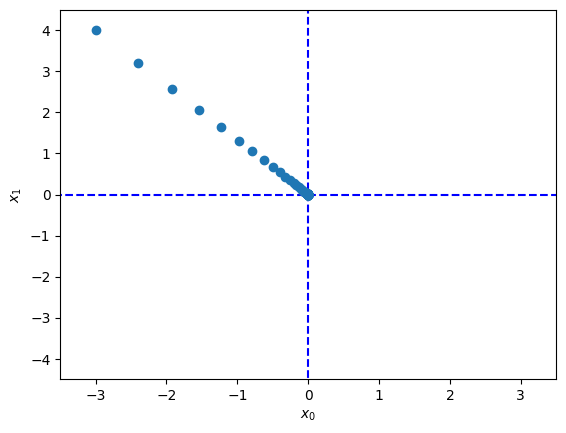

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.show()


In [5]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss
    
net = SimpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p, np.argmax(p))
t = np.array([0, 0, 1])
net.loss(x, t)


[[-0.40181873  2.23047714 -0.52655011]
 [ 0.21313367  0.0273588   0.65834315]]
[-0.04927094  1.3629092   0.27657877] 1


np.float64(1.5444280817865927)

In [7]:
def f(W):
    return net.loss(x, t)
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.09244843  0.37949107 -0.4719395 ]
 [ 0.13867264  0.56923661 -0.70790925]]


### Stochastic Gradient Descent

In [9]:
from common.functions import *

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
x = np.random.rand(100, 784)
y = net.predict(x)
print(y)

[[0.10464143 0.09707443 0.0994014  0.10168313 0.09752085 0.10274118
  0.09652381 0.09876028 0.09893597 0.10271752]
 [0.10495155 0.09741975 0.0993933  0.10179793 0.09744317 0.10235814
  0.09631183 0.09843623 0.09935545 0.10253264]
 [0.10490241 0.09736232 0.09920258 0.10148363 0.09735223 0.10290642
  0.09697152 0.09855326 0.09916412 0.10210151]
 [0.10498556 0.09714975 0.0995066  0.10202758 0.09701878 0.10269857
  0.09631347 0.09861506 0.09931952 0.10236511]
 [0.10468982 0.09736385 0.09960823 0.10166702 0.09708723 0.10264493
  0.09674039 0.09891066 0.09885769 0.10243019]
 [0.10517208 0.09715168 0.09962074 0.1013577  0.09689907 0.10278673
  0.09683704 0.09876057 0.09922772 0.10218667]
 [0.1047796  0.09705237 0.09948048 0.10151768 0.09718249 0.1029334
  0.09683627 0.09866287 0.09930431 0.10225053]
 [0.10480871 0.09741382 0.09925451 0.10155269 0.09747106 0.10271452
  0.09676888 0.09871628 0.09888101 0.10241853]
 [0.10490158 0.09708276 0.09920861 0.1012644  0.09745877 0.10281629
  0.09687134 

In [10]:
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t)

In [13]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.10195, 0.101
train acc, test acc | 0.7871666666666667, 0.7903
train acc, test acc | 0.8765333333333334, 0.8777
train acc, test acc | 0.8982166666666667, 0.9011
train acc, test acc | 0.9079666666666667, 0.9107
train acc, test acc | 0.91395, 0.9157
train acc, test acc | 0.9191166666666667, 0.9215
train acc, test acc | 0.9234333333333333, 0.9253
train acc, test acc | 0.9262666666666667, 0.9268
train acc, test acc | 0.9301333333333334, 0.9298
train acc, test acc | 0.93285, 0.9329
train acc, test acc | 0.93525, 0.934
train acc, test acc | 0.9384666666666667, 0.9376
train acc, test acc | 0.9407666666666666, 0.9402
train acc, test acc | 0.9423666666666667, 0.9404
train acc, test acc | 0.9447333333333333, 0.9423
train acc, test acc | 0.9454, 0.9427


In [18]:
import pickle
import os
model_path = '../models/two_layer_net.pkl'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
with open(model_path, 'wb') as f:
    pickle.dump(network.params, f)
print(f"Model saved to {model_path}")

history_path = '../models/training_history.pkl'
history = {
    'train_loss': train_loss_list,
    'train_acc': train_acc_list,
    'test_acc': test_acc_list
}
with open(history_path, 'wb') as f:
    pickle.dump(history, f)
print(f"Training history saved to {history_path}")

Model saved to ../models/two_layer_net.pkl
Training history saved to ../models/training_history.pkl


In [19]:
import pickle
import os
model_path = '../models/two_layer_net.pkl'
history_path = '../models/training_history.pkl'
with open(model_path, 'rb') as f:
    loaded_params = pickle.load(f)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
network.params = loaded_params
with open(history_path, 'rb') as f:
    history = pickle.load(f)
train_loss_list = history['train_loss']
train_acc_list = history['train_acc']
test_acc_list = history['test_acc']
print(f"Model and history loaded successfully!")
print(f"Iterations: {len(train_loss_list)}, Epochs: {len(train_acc_list)}")
print(f"Test Accuracy: {network.accuracy(x_test, t_test):.4f}")

Model and history loaded successfully!
Iterations: 10000, Epochs: 17
Test Accuracy: 0.9450


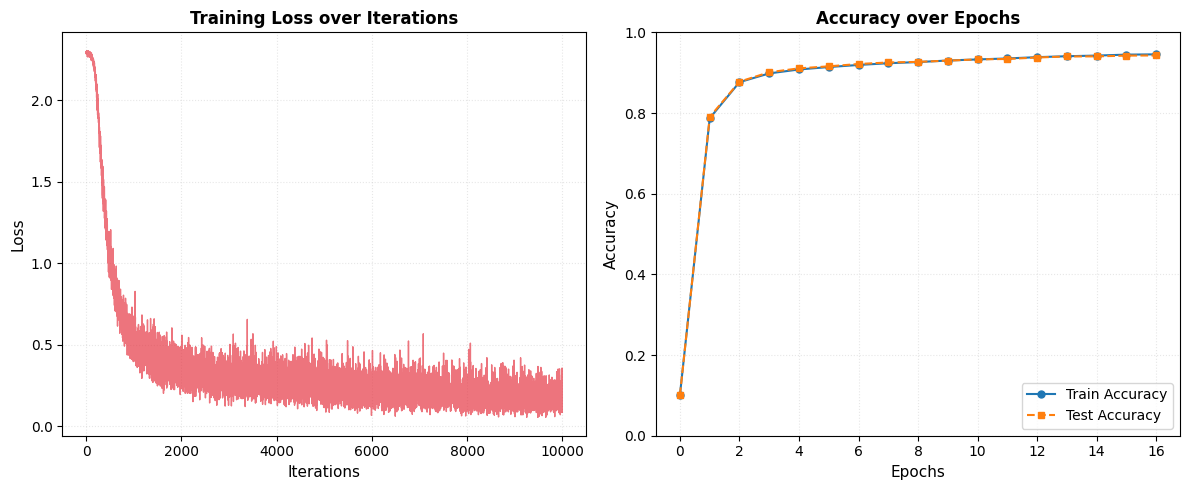

Initial Loss: 2.2913
Final Loss: 0.1857
Loss Reduction: 2.1056

Final Train Accuracy: 0.9454
Final Test Accuracy: 0.9427


In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x_loss = np.arange(len(train_loss_list))
plt.plot(x_loss, train_loss_list, color='#E63946', linewidth=1, alpha=0.7)
plt.xlabel("Iterations", fontsize=11)
plt.ylabel("Loss", fontsize=11)
plt.title("Training Loss over Iterations", fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle=':')

plt.subplot(1, 2, 2)
x_acc = np.arange(len(train_acc_list))
plt.plot(x_acc, train_acc_list, marker='o', markersize=5, label='Train Accuracy')
plt.plot(x_acc, test_acc_list, marker='s', markersize=5, linestyle='--', label='Test Accuracy')
plt.xlabel("Epochs", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.title("Accuracy over Epochs", fontsize=12, fontweight='bold')
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

print(f"Initial Loss: {train_loss_list[0]:.4f}")
print(f"Final Loss: {train_loss_list[-1]:.4f}")
print(f"Loss Reduction: {train_loss_list[0] - train_loss_list[-1]:.4f}")
print(f"\nFinal Train Accuracy: {train_acc_list[-1]:.4f}")
print(f"Final Test Accuracy: {test_acc_list[-1]:.4f}")

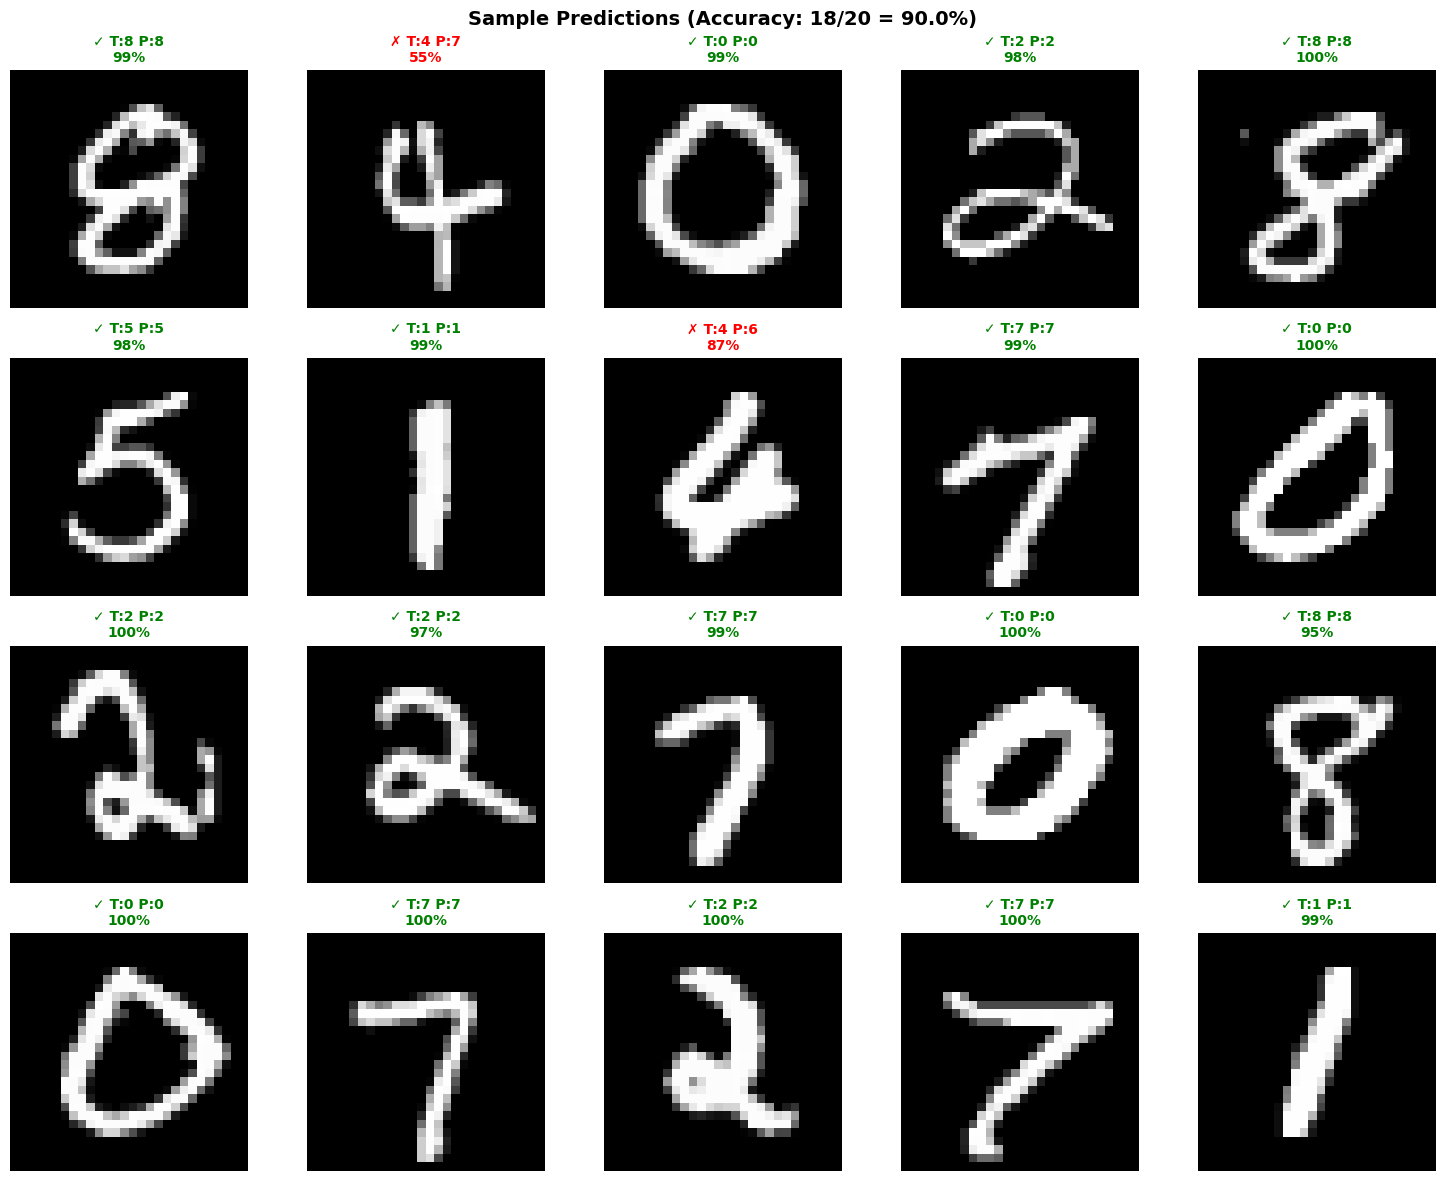


Calculating confusion matrix on test set...


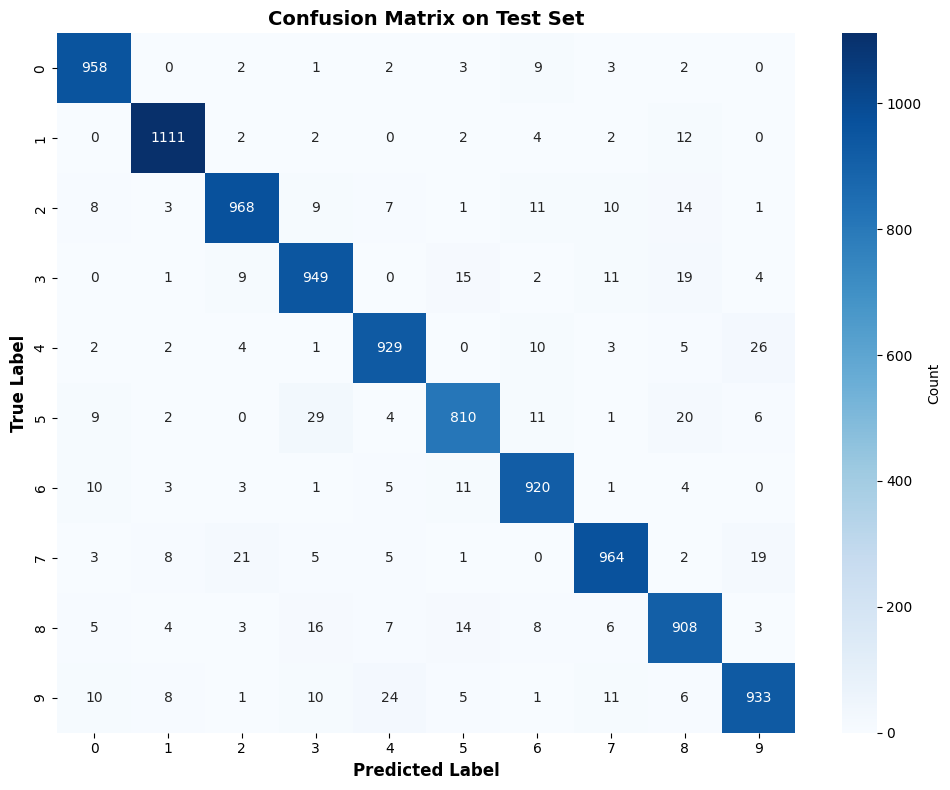


PER-CLASS ACCURACY
Digit 0: 97.76% (958/980)
Digit 1: 97.89% (1111/1135)
Digit 2: 93.80% (968/1032)
Digit 3: 93.96% (949/1010)
Digit 4: 94.60% (929/982)
Digit 5: 90.81% (810/892)
Digit 6: 96.03% (920/958)
Digit 7: 93.77% (964/1028)
Digit 8: 93.22% (908/974)
Digit 9: 92.47% (933/1009)

Finding misclassified examples...


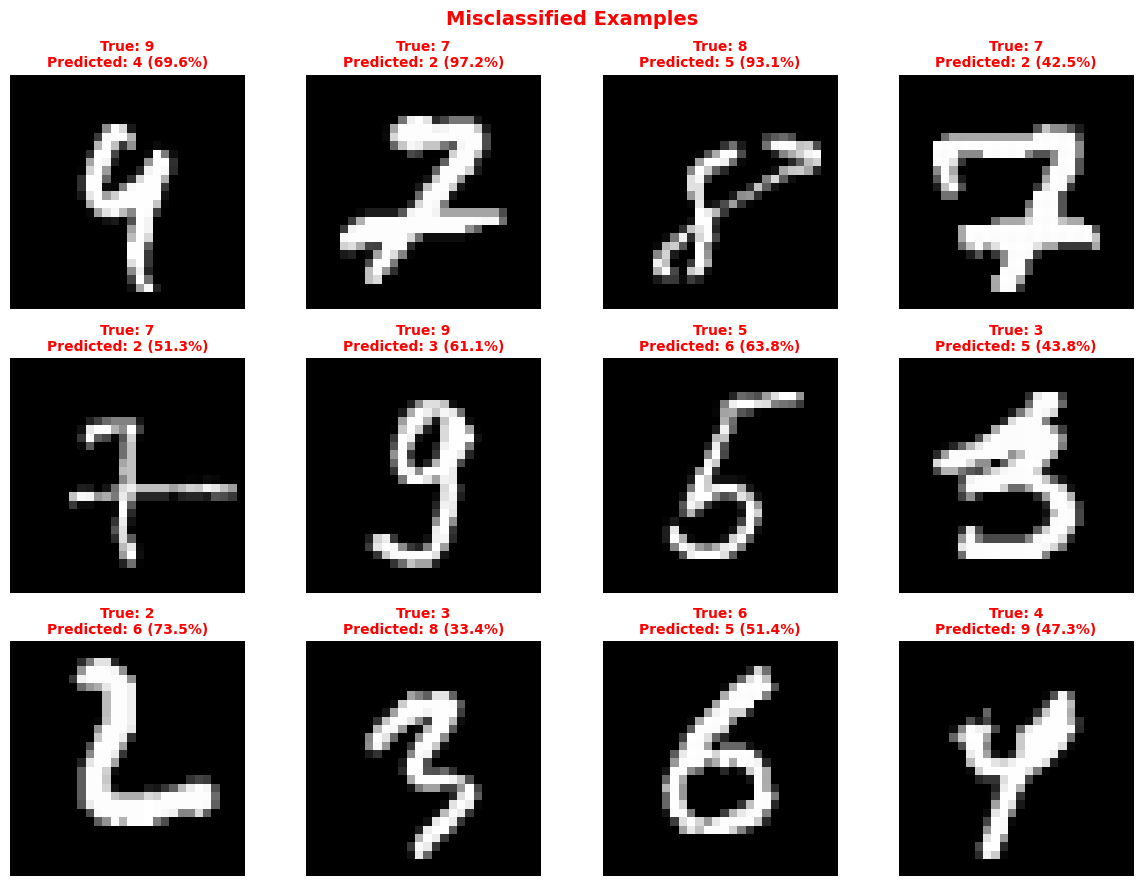

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. 显示预测示例
num_samples = 20
indices = np.random.choice(len(x_test), num_samples, replace=False)

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

correct_count = 0
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28)
    true_label = np.argmax(t_test[idx])
    
    y_pred = network.predict(x_test[idx:idx+1])
    pred_label = np.argmax(y_pred)
    confidence = np.max(y_pred) * 100
    
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    
    is_correct = pred_label == true_label
    if is_correct:
        correct_count += 1
    
    color = 'green' if is_correct else 'red'
    marker = '✓' if is_correct else '✗'
    title = f'{marker} T:{true_label} P:{pred_label}\n{confidence:.0f}%'
    axes[i].set_title(title, color=color, fontsize=10, fontweight='bold')

plt.suptitle(f'Sample Predictions (Accuracy: {correct_count}/{num_samples} = {correct_count/num_samples*100:.1f}%)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. 计算并显示混淆矩阵
print("\nCalculating confusion matrix on test set...")
y_test_pred = network.predict(x_test)
y_test_labels = np.argmax(t_test, axis=1)
y_pred_labels = np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix on Test Set', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. 打印每个数字的准确率
print("\n" + "="*60)
print("PER-CLASS ACCURACY")
print("="*60)
for i in range(10):
    class_mask = y_test_labels == i
    class_acc = np.mean(y_pred_labels[class_mask] == i)
    total_samples = np.sum(class_mask)
    correct_samples = np.sum((y_pred_labels[class_mask] == i))
    print(f"Digit {i}: {class_acc*100:5.2f}% ({correct_samples}/{total_samples})")
print("="*60)

# 4. 显示一些错误分类的案例
print("\nFinding misclassified examples...")
misclassified_indices = np.where(y_pred_labels != y_test_labels)[0]
num_errors = min(12, len(misclassified_indices))

if num_errors > 0:
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.flatten()
    
    error_indices = np.random.choice(misclassified_indices, num_errors, replace=False)
    
    for i, idx in enumerate(error_indices):
        img = x_test[idx].reshape(28, 28)
        true_label = y_test_labels[idx]
        pred_label = y_pred_labels[idx]
        confidence = np.max(y_test_pred[idx]) * 100
        
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
        title = f'True: {true_label}\nPredicted: {pred_label} ({confidence:.1f}%)'
        axes[i].set_title(title, color='red', fontsize=10, fontweight='bold')
    
    plt.suptitle('Misclassified Examples', fontsize=14, fontweight='bold', color='red')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified examples found!")

- 机器学习中使用的数据集分为训练数据和测试数据。
- 神经网络用训练数据进行学习，并用测试数据评价学习到的模型的泛化能力。
- 神经网络的学习以损失函数为指标，更新权重参数，以使损失函数的值减小。
- 利用某个给定的微小值的差分求导数的过程，称为数值微分。
- 利用数值微分，可以计算权重参数的梯度。
- 数值微分虽然费时间，但是实现起来很简单。下一章中要实现的稍微复杂一些的误差反向传播法可以高速地计算梯度。